### Google Colab Integration

Die folgende Zelle können Sie überspringen, wenn Sie mit einer lokalen Installation arbeiten. Wenn Sie das Notebook auf Google-Colab ausführen, dann müssen Sie als erstes diese Zelle ausführen und danach die Seite neu laden (F5).

In [ ]:
!echo "Update environment..."
!apt update -q  &> /dev/null
!echo "Install Java..."
!apt-get install -q openjdk-11-jdk-headless &> /dev/null
!echo "Install Jupyter java kernel..."
!curl -L https://github.com/SpencerPark/IJava/releases/download/v1.3.0/ijava-1.3.0.zip -o ijava-kernel.zip &> /dev/null
!unzip -q ijava-kernel.zip -d ijava-kernel && cd ijava-kernel && python3 install.py --sys-prefix &> /dev/null
!echo "Downloading turtle jar ..."
!curl -L https://github.com/Andreas-Forster/gyminf-programmieren/raw/master/notebooks/jturtle-0.6.jar -o jturtle-0.6.jar &> /dev/null
!echo "Done."

# Turtle Referenz

#### Andreas Morel-Forster, Departement Mathematik und Informatik, Universität Basel

In diesem Notebook führen wir das Konzept von Turtle Grafik ein und erklären die wichtigsten Befehle, die Sie in dieser Vorlesung brauchen um eigene Grafiken zu erstellen. 

#### Setup der Bibliotheken in Jupyter

Turtle Grafik gehört nicht zum Standardumfang der Java Programmiersprache. Die Funktionalität die wir hier nutzen wird von einer externen *Bibliothek* zur Verfügung gestellt. Java und die Jupyter-Notebook Umgebung wissen zunächst mal nichts von dieser Bibliothek. Damit wir die Befehle in dieser Bibliothek verwenden können, müssen wir Sie zuerst im Jupyter-Notebook zur Verfügung stellen.


Wenn Sie Google-Colab verwenden, dann wurde die Turtle-Bibliothek schon mit dem Ausführen der ersten Zelle geladen. Wenn Sie eine lokale Installation der Jupyter Notebooks verwenden, laden Sie einmalig [diese](https://github.com/Andreas-Forster/gyminf-programmieren/raw/master/notebooks/jturtle-0.6.jar) Bibliothek (Datei) herunter und laden Sie diese anschliessend wie ein Notebook in Ihre lokale Umgebung hoch.

Nun müssen wir die Turtle-Bibliothek noch in das Jupyter-Notebook laden:

In [1]:
%jars jturtle-0.6.jar

*Hinweis:* Der Befehl der letzten Code-Zelle ist ein Kommando, das so nur in Jupyter-Notebooks verwendet werden kann und entsprechen nicht gültigem Java Code. 

Durch das Ausführen der folgenden Zelle machen Sie die Befehle um die Turtle zu steuern welche in der Bibliothek definiert sind sichtbar:

In [2]:
import static ch.unibas.informatik.jturtle.TurtleCommands.*

#### Eine erste Zeichnung

Das Prinzip hinter Turtle Grafik ist, dass wir uns eine Schildkröte vorstellen können, die einen Stift mitführt. Wir können diese Schildkröte mit verschiedenen Befehlen anweisen sich zu bewegen und können so entsprechend Zeichnungen erstellen. 
Um die Prinzipien der Turtle Grafik zu erläutern, beginnen wir gleich mit einem ersten Programm, welches wie folgt aussieht:
```
clear();
penDown();
forward(50);
turnRight(90);
forward(50);
display(drawing());
```


Mit dem Befehl ```clear()``` wird die Zeichenfläche erstmals geleert. Wir beginnen also mit einer leeren Zeichnung. Der Befehl ```penDown()``` bewirkt, dass die Schildkröte den Zeichnungsstift auf das Blatt setzt. 
Mit dem Befehl ```forward(50)``` weisen wir die Schildkröte an sich um 50 Schritte vorwärts zu bewegen. Danach soll sich die Schildkröte um 90 Grad nach rechts drehen ```turnRight(90)``` und dann nochmals 50 Schritte nach vorwärts gehen. 
Die so erstellte Zeichnung kann mit dem Befehl ```display(drawing())``` angezeigt werden. 

Wenn wir die nachfolgende Zelle des Jupyter-Notebooks ausführen, können wir uns die entstandene Zeichnung anschauen. 

In [ ]:
clear();
penDown();
forward(50);
turnRight(90);
forward(50);
display(drawing());


*Miniübung:* Was passiert, wenn Sie die obige Zelle mehrmals hintereinander ausführen? Können Sie sicher erklären warum?

Damit is etwas einfacher nachzuvollziehen ist, wie diese Zeichnung entsteht, bietet uns die Turtle Bibliothek den Befehl ```drawTurtle```. Dieser Zeichnet eine Schildkröte an die Position, wo die Schildkröte zum Moment der Befehlsausführung gerade steht. 
Wir führen die obigen Befehle nochmals aus, zeigen dazwischen aber immer wieder das Turtle:

In [ ]:
clear();
drawTurtle();
penDown();
forward(50);
drawTurtle();
turnRight(90);
forward(50);
drawTurtle();
display(drawing());



#### Das Koordinatensystem der Zeichenfläche

Zu beginn steht das Turtle immer in der Mitte der Zeichenfläche und schaut nach oben. Auf diese Ausgangsposition kommt man immer wieder durch den Aufruf des Befehls ```home()``` zurück. Die Zeichenfläche hat die Grösse $200 \times 200$. Von der Ausgangsposition kann man also 100 Einheiten in eine Richtung laufen. Folgender Code veranschaulicht das Koordinatensystem. Beachten Sie, dass wir hier auch gleich einen neuen Befehl einführen, nämliche ```penUp()```, welcher die offensichtliche Bedeutung hat.

In [ ]:
clear();
home();
drawTurtle();
forward(100);
penDown();
turnRight(180);
forward(200);
home();
turnRight(90);
penUp();
forward(100);
penDown();
turnRight(180);
forward(200);

display(drawing());


#### Einfache Zeichnenbefehle

Im folgenden sind die wichtigsten Befehle um Zeichnungen zu erstellen zusammengefasst:

* ```forward(x)``` bewegt das Turtle ```x``` Schritte vorwärts
* ```backward(x)``` bewegt das Turtle ```x``` Schritte rückwärts
* ```turnRight(x)``` dreht das Turtle um ```x``` Grad um die eigene Achse (nach rechts)
* ```turnLeft(x)``` dreht das Turtle um ```x``` Grad um die eigene Achse (nach links)
* ```penUp()``` nimmt den Zeichenstift hoch
* ```penDown()```  setzt den Zeichenstift aufs blatt
* ```home()``` stellt das Turtle zurück auf die Mitte des Blatts und richtet es nach Norden aus.
* ```clear()``` Leert die Zeichenfläche



#### Zeichenfarben und Liniendicke

Mit den folgenden Befehlen können wir die Zeichenfarbe und die Liniendicke verändern:

* ```penSize(x)``` Setzt die dicke des Stifts (Liniendicke) auf x.
* ```penColor(color)``` Setzt die Farbe. Gültige Farben sind ```BLACK, BLUE, GREEN, RED, ORANGE, YELLOW, WHITE, GREY```

Weitere Farben können mit dem Befehle ```color(r,g,b)``` definiert werden, wobei ```r```, ```g```, ```b``` Werte zwischen 0 und 255 sind.

Dies ist in folgendem Code illustriert.

In [ ]:
clear();
home();
penSize(1);
penColor(GREEN);
forward(100);
turnRight(90);
penColor(color(255, 96, 0));
forward(100);
turnRight(90);
penSize(10);
forward(100);
display(drawing());


### Weitere Befehle

* ```reset()``` Setzt alle Attribute (wie Farbe, Liniendicke, etc.) auf die Standardeinstellungen zurück.
* ```fill()```  Füllt eine geschlossene geometrische Figur um die aktuelle Turtle Position mit der gewünschten Farbe
* ```write(text, fontsize)``` Schreibt den Text an die aktuelle Turte Position.


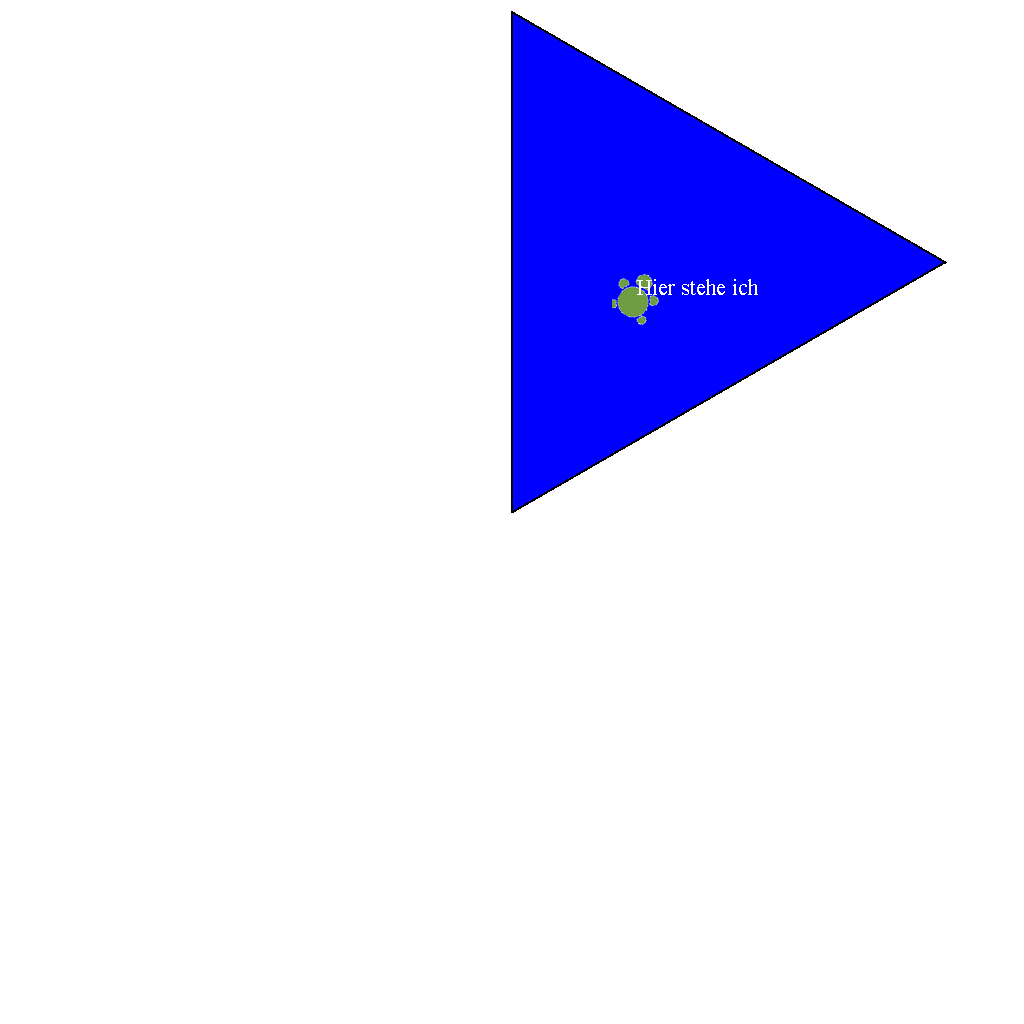

b5811624-1c7d-40cb-b044-92ccb4a7305e

In [3]:
reset();
clear();
penDown();
forward(100);
turnRight(120);
forward(100);
turnRight(120);
forward(100);
penUp();
turnRight(150);
forward(50);
penColor(BLUE);
fill();

drawTurtle();

penColor(WHITE);
write("Hier stehe ich", 22);
    
display(drawing());

#### Übungen

* Zeichnen Sie ein 5-eck
* Zeichnen Sie ein einfaches Haus. Können Sie Türen und Fenster einzeichnen?
    * Machen Sie ihr Haus farbig
